# Trabajo Preparacion, visualizacion de Datos y Machine learning con Python<a class="tocSkip">
## Ciencia de datos en Produccion <a class="tocSkip">

**Estudiante:** Juan Felipe Salcedo 

**ID:** xxxxxxxxxx

**Email:** jfsalcedo@uniquindio.edu.co

# Importar Librerias

In [88]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, confusion_matrix
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


# Cargar Datasets

In [89]:
data_train = pd.read_parquet('../data/processed/data_train.parquet')
data_train['price_range'] = data_train['price_range'].astype('float')
#data_test['price_range'] = data_test['price_range'].astype('category')

In [90]:
label = {'price_range'}
columns_set = set(data_train.columns.values)
x = data_train[list(columns_set-label)]
y = data_train[list(label)]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Feature Engineering 
### Transformacion de Variables
**Se usa cuando es necesario:**
- Cambiar la escala las variables (Normalizar, escalamiento, etc), esto no cambia la forma de la distribucion de los datos
- Cambiar relaciones No ineales en Lineales (Ej: cambiar la escala Logaritmica a lineal)
- Usar una la distribución simétrica en vez de una distribución sesgada o asimetrica, Para una la distribución sesgada a la derecha, tomamos la raíz cuadrada / cúbica o el logaritmo de la variable, y para la desviación a la izquierda, tomamos el cuadrado / cubo o exponencial de las variables.
- Cambair variables continuas a categoricas

En este caso al eliminar las variables categóricas no se realizó el proceso de obtener las variables dummies

# MODELAMIENTO DE LOS DATOS (MACHINE LEARNING)


Para el modelo se utilizó el algoritmo Decision Tree y a primer momento se obtuvo un accuracy de 81.97% con una desviación estandar de 0.03 en la validación cruzada

In [91]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [92]:
kFold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'
score = (model_selection.cross_val_score(clf, X_train, y_train,  scoring = scoring, cv = kFold))
print (f"( {score.mean()}, {score.std()})")

( 0.8104166666666668, 0.038073730513650525)


In [93]:
list(data_train.price_range.unique())

[0.0, 1.0, 3.0, 2.0]

In [94]:
feature_names = list(data_train.columns)
feature_names.pop(len(feature_names)-1)

'price_range'

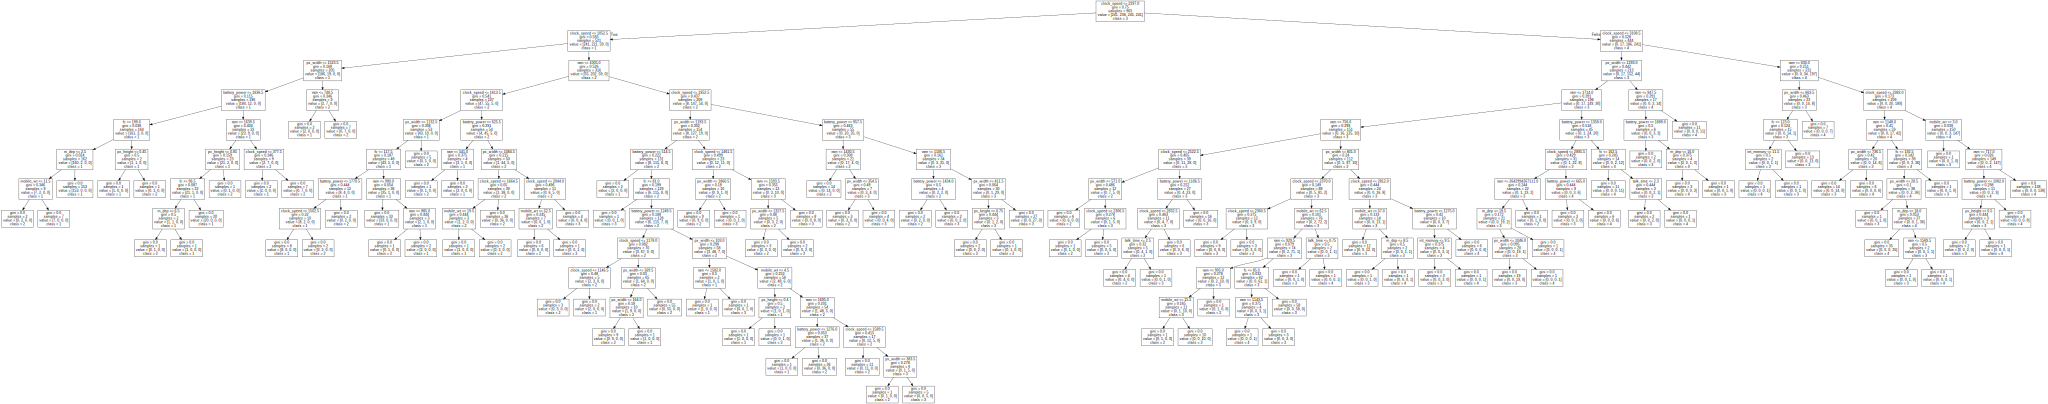

In [95]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, feature_names= feature_names, class_names=["1","2","3","4"]) 
graph = graphviz.Source(dot_data) 
graph

In [96]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

c:\Users\cristian.sanchezp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

Se utilizó el clasificador de bayes el cual obtuvo un índice en la validación cruzada menor al 50% con una desviación estandar de 0.17. Este clasificador no se utilizará. 

In [97]:
kFold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'
score_bayes = (model_selection.cross_val_score(gnb, X_train, y_train,  scoring = scoring, cv = kFold))
print (f"( {score_bayes.mean()}, {score_bayes.std()})")

( 0.321252147766323, 0.1792281543354693)


c:\Users\cristian.sanchezp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\cristian.sanchezp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\cristian.sanchezp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\cristian.sanchezp\AppData\Local\Programs\Python\Python310\lib\site-

# Optimizacion de Hiper parametros (Hyper Parameter optimization)

Se seleccionan solo los mejores modelos para realizar el ajuste de hiperparametros, ya que tiene una carga computacional alta.

Al final se obtienen los parametros del mejor modelo

Al realizar el análisis para la hiperparametrización, se observa que se obtiene un accuracy de 0.76 el cual es menor al obtenido con los valores por defecto, por lo cual no se tendrá en cuenta el análisis para los hiperparametros

In [98]:
params= {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'max_features': ['auto', 'sqrt', 'log2']
        }
clf1 =  GridSearchCV(DecisionTreeClassifier(), params, cv=5, return_train_score=True)
clf1.fit(X_train, y_train)
print('best_score: ', clf1.best_score_)
print('best_params: ', clf1.best_params_)

c:\Users\cristian.sanchezp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\cristian.sanchezp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\cristian.sanchezp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\cristian.sanchezp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: 

best_score:  0.7616580310880829
best_params:  {'criterion': 'log_loss', 'max_features': 'auto'}


c:\Users\cristian.sanchezp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [111]:
clf_final = DecisionTreeClassifier()
clf_final.fit(x, y)

DecisionTreeClassifier()

# Evaluacion final del modelo con el Test set

Tomar los parametros obtenidos en el paso anterior, se crea el modelo con esos pararmetros y se entrena el modelo con todos los datos del **Train -set**

Finalmente se realiza la evaluacion (segun su problema si es de regresion o de clasificacion) usando el **Test - set** para definir si el modelo obtenido esta bien. Compare los resultados con el **Train -set** vs los resultados con el **Test - set**

Al realizar el testeo con el dataset de 

In [100]:
data_test = pd.read_parquet('../data/processed/data_test.parquet')

Se eliminan los valores nulos y los datos que en la variable de salida no tengan sentido

In [101]:
data_test['price_range'].replace('nhbgvfrtd 56gyub', np.nan, inplace=True)
data_test['price_range'].replace('??????', np.nan, inplace=True)
data_test['price_range'].replace('5285988458456.0', np.nan, inplace=True)
data_test['price_range'].replace('-948961565145.0', np.nan, inplace=True)
data_test['price_range'] = data_test['price_range'].astype('category')

In [102]:
data_test = data_test.dropna()

In [103]:
data_test['price_range'] = data_test['price_range'].astype('float')
X_test = data_test.drop('price_range', axis=1)
y_test = data_test['price_range']

In [112]:
y_pred = clf_final.predict(X_test)


c:\Users\cristian.sanchezp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Al realizar el testeo final con el dataset de testing, se obtuvo un score menor a 50% 

In [113]:
score = accuracy_score(y_test, y_pred)
print('Accuracy: {}'.format(score))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))

Accuracy: 0.3451178451178451
Precision score:  0.3451178451178451
Recall score:  0.3451178451178451


In [114]:
pd.concat([data_train, data_test]).to_parquet('../data/processed/data_complete.parquet') 

In [120]:
data_complete = pd.read_parquet('../data/processed/data_complete.parquet')
X = data_complete.drop('price_range', axis=1)
y = data_complete['price_range']

Al realizar la validación cruzada con todo el dataset completo se obtuvo un score de 0.83 con una desviación estandar de 0.01

In [121]:
clf_final = DecisionTreeClassifier()
clf_final.fit(X, y)

DecisionTreeClassifier()

In [122]:
kFold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'
score = (model_selection.cross_val_score(clf_final, X, y,  scoring = scoring, cv = kFold))
print (f"( {score.mean()}, {score.std()})")

( 0.8388376147259397, 0.018963876017415865)


# Implementacion del Modelo (Deploying)
Con el análisis básico y el ajuste hecho, comienza el trabajo real (ingeniería).

El último paso para poner en produccion el modelo de prediccion sera:
1. Entrenarlo en todo el conjunto de datos nuevamente, para hacer un uso completo de todos los datos disponibles. 
2. Usar los mejores parámetros encontrados mediante la validación cruzada, por supuesto. Esto es muy similar a lo que hicimos al principio, pero esta vez teniendo una idea de su comportamiento y estabilidad. La evaluación se realizó con honestidad, en divisiones distintas de entrenamiento / prueba.

El predictor final se puede serializar y grabar en el disco, de modo que la próxima vez que lo usemos, podemos omitir todo el entrenamiento y usar el modelo capacitado directamente:

In [107]:
#import pickle # Esta es una libreria de serializacion nativa de python, puede tener problemas de seguridad
from joblib import dump # libreria de serializacion

# garbar el modelo en un archivo
#dump(Modelo_final, 'Nombre_Archivo_Modelo.joblib')

# Conclusiones

El dataset contiene gran cantida de columnas numéricas y categoricas, al momento de realizar el test de chi square para sacar las variables categóricas que impactan en el modelo, se obtuvo que ninguna de ellas tiene un sentido significativo para la predicción. 

Algunas variables relacionadas con el tamaño de la pantalla como lo son sc_h y sc_w a su vez como px_width y px_height contaban lo mismo ya que tienen una correlación alta, por lo cual uno de estos pares se eliminó ya que no tenía riqueza en el momento de la predicción. De la misma forma las variables fc y pc (cantidad de megapixeles en las camaras) tiene una correlación alta, sobre el 60% por lo cual una de estas también se eliminó. 

El clasificador utilizado fue un Decision Tree y obtuvo un accuracy con la validación cruzada sobre el 80% con una desviación estandar de 0.01. 

El haber eliminado columnas que no tenían mucho aporte al modelo fue decisivo para que el clasificador funcionara de la mejor manera, ya que al utilizar hiperparametrización no se vio mejora. 

# Ayudas Y Referencias

- https://medium.com/@joserzapata/paso-a-paso-en-un-proyecto-machine-learning-bcdd0939d387
- [Proyecto de Principio a Final sobre readmision de pacientes con Diabetes](https://github.com/JoseRZapata/Readmission-ML-Project)

- [a-complete-machine-learning-walk-through-in-python-part-one](https://towardsdatascience.com/a-complete-machine-learning-walk-through-in-python-part-one-c62152f39420)


- [a-starter-pack-to-exploratory-data-analysis-with-python-pandas-seaborn-and-scikit-learn](https://towardsdatascience.com/a-starter-pack-to-exploratory-data-analysis-with-python-pandas-seaborn-and-scikit-learn-a77889485baf#249d)

- [a-data-science-for-good-machine-learning-project-walk-through-in-python-part-one](https://towardsdatascience.com/a-data-science-for-good-machine-learning-project-walk-through-in-python-part-one-1977dd701dbc)

- [Ejemplos de Kaggle](https://www.kaggle.com/kernels?sortBy=hotness&group=everyone&pageSize=20&language=Python&kernelType=Notebook)

- [END to END ML from data colletion to deployment](https://medium.com/datadriveninvestor/end-to-end-machine-learning-from-data-collection-to-deployment-ce74f51ca203)